### The second step in our pipeline is PCA, to reduce the dimensionality of our data, making it easier to run a UMAP in the next step and allowing us to check that the PCA looks normal

In [ ]:
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = sc.read("../1_preprocessing/preprocessed_data.h5ad")

In [7]:
#reproducibility
np.random.seed(42)

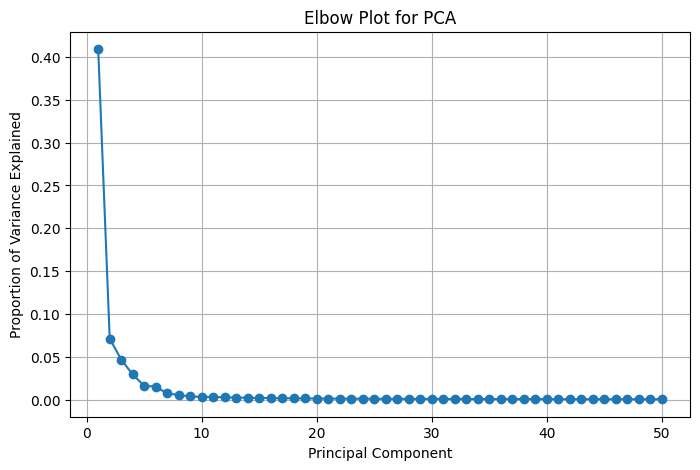

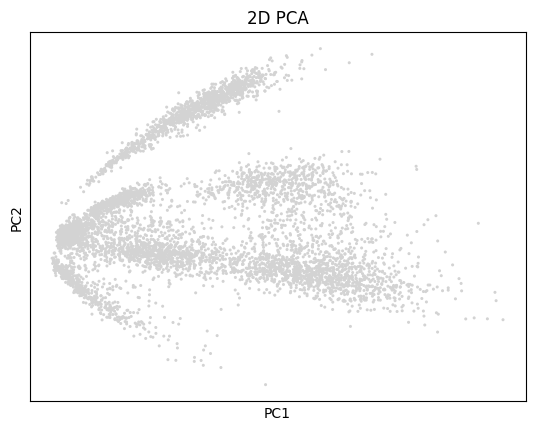

In [8]:
sc.tl.pca(data, svd_solver='arpack', n_comps = 50)

#elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(data.uns['pca']['variance_ratio']) + 1), data.uns['pca']['variance_ratio'], marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Elbow Plot for PCA')
plt.grid(True)
plt.show()

#2D plot
sc.pl.pca(data, title='2D PCA')

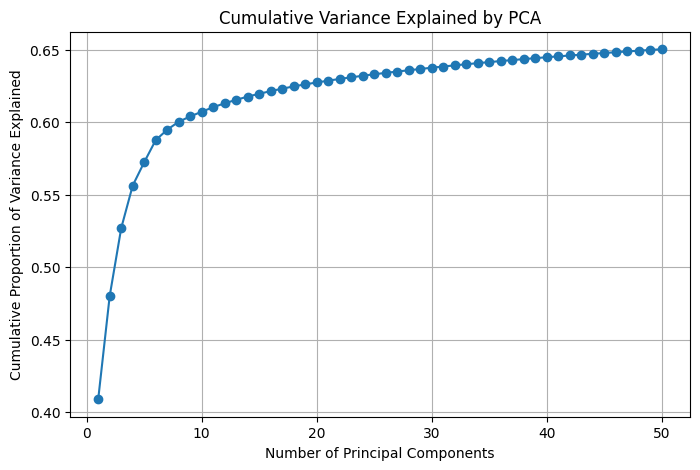

In [ ]:
cumulative_variance = np.cumsum(data.uns['pca']['variance_ratio'])

#cumsum plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Variance Explained by PCA')
plt.grid(True)
plt.show()

data.write('../2_PCA/PCA_data.h5ad')

We see that the first PC by itself explains 40% of the variance, but its followed by sharp diminishing returns, with 50 PCs, we get an explained variance of ~65%, which if fine for single cell analysis. The high dimensionality of our dataset makes it hard to compress down into just 50 PCs in our case. <br>
We note the first two PCs cannot capture the data well by themeselves. We also notice that the points are smeared along the PC1 axis, reflecting its high.er explanatory power <br>
This justifies our choice of only using 50PCs for the downstream analysis since we have greatly diminishing returns on the explained variance.
